# Assignment 4

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [2]:
import tensorflow as tf

# Disable all GPUs, forcing TensorFlow to fall back to CPU.
tf.config.set_visible_devices([], 'GPU')
# tf.config.experimental.set_visible_devices([], 'GPU')

# print("Devices available: ", tf.config.experimental.list_physical_devices('GPU'))
print("Devices available: ", tf.config.list_physical_devices('GPU'))


Devices available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set_theme(style="darkgrid")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.datasets import fashion_mnist

tf.get_logger().setLevel('INFO')

---
### Step 1: Data ingestion

You'll train a binary classifier using the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. This consists of 70,000 grayscale images (28x28). Each image is associated with 1 of 10 classes. The dataset was split by the creators; there are 60,000 training images and 10,000 test images. Note also that Tensorflow includes a growing [library of datasets](https://www.tensorflow.org/datasets/catalog/overview) and makes it easy to load them in numpy arrays.

In [4]:
# Load the Fashion MNIST dataset.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

---
### Step 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) and Data Preprocessing are often iterative processes that involve going back and forth to refine and improve the quality of data analysis and preparation. However, the specific order can vary depending on the project's requirements. In some cases, starting with EDA, as you see in this assignment, could be more useful, but there is no rigid rule dictating the sequence in all situations.

### <span style="color:chocolate">Exercise 1:</span> Getting to know your data (5 points)

Complete the following tasks:

1. Print the shapes and types of (X_train, Y_train) and (X_test, Y_test). Interpret the shapes (i.e., what do the numbers represent?). Hint: For types use the <span style="color:chocolate">type()</span> function.
2. Define a list of strings of class names corresponding to each class in (Y_train, Y_test). Call this list label_names. Hint: Refer to the Fashion MNIST documentation.

In [5]:
# 1
print(f"{X_train.shape = }")
print(f"{X_test.shape = }")
print(f"{Y_train.shape = }")
print(f"{Y_test.shape = }")

print(f"{type(X_train) = }")
print(f"{type(X_test) = }")
print(f"{type(Y_train) = }")
print(f"{type(Y_test) = }")

# the shape of the X datasets shows that they contain 60,000 or 10,000 images instances of a 28x28 array of numbers in range (0,255), with the values represting the color intensity at each pixel. 
# the first index level is the image number, the second index level is the row, and the third is the column number for each pixel within the image

# the Y datasets are 1D arrays with length equal to the length of the corresponding X data. The Y values represent the label for each image in the X datasets.

X_train.shape = (60000, 28, 28)
X_test.shape = (10000, 28, 28)
Y_train.shape = (60000,)
Y_test.shape = (10000,)
type(X_train) = <class 'numpy.ndarray'>
type(X_test) = <class 'numpy.ndarray'>
type(Y_train) = <class 'numpy.ndarray'>
type(Y_test) = <class 'numpy.ndarray'>


In [6]:
# 2
label_names = [
    "T-shirt/top",  # 0
    "Trouser",      # 1
    "Pullover",     # 2
    "Dress",        # 3
    "Coat",         # 4
    "Sandal",       # 5
    "Shirt",        # 6
    "Sneaker",      # 7
    "Bag",          # 8
    "Ankle boot"    # 9
]

### <span style="color:chocolate">Exercise 2:</span> Getting to know your data - cont'd (5 points)

Fashion MNIST images have one of 10 possible labels (shown above). 

Complete the following tasks:

1. Display the first 5 images in X_train for each class in Y_train, arranged in a 10x5 grid. Use the label_names list defined above;
2. Determine the minimum and maximum pixel values for images in the X_train dataset.

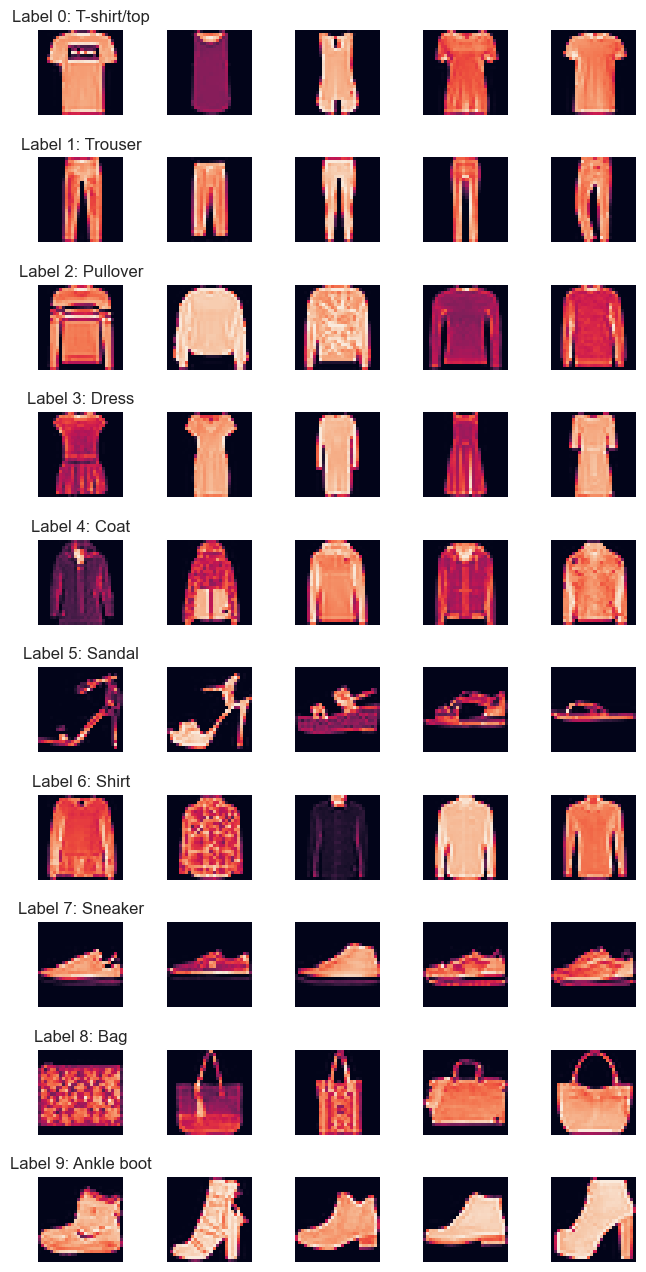

In [7]:
# YOUR CODE HERE
# 1 

def print_examples(num_rows, num_cols):

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 16))

    # Iterate through each label (each label is one row)
    for row_num in range(10):
        # find the first 5 images of this label in Y_train
        image_indices = np.where(Y_train == row_num)[0][:5]
        
        for col, index in enumerate(image_indices):
            ax = axes[row_num, col]
            ax.imshow(X_train[index])
            ax.axis('off')
            if col == 0:
                ax.set_title(f"Label {row_num}: {label_names[row_num]}")

    # Adjust layout and show the plot
    plt.subplots_adjust(hspace=0.5)
    plt.show()

print_examples(num_rows = 10, num_cols = 5)

In [8]:
#2
min_pixel_value = X_train.min()
max_pixel_value = X_train.max()

print(f"{min_pixel_value = }")
print(f"{max_pixel_value = }")

min_pixel_value = 0
max_pixel_value = 255


---
### Step 3: Data preprocessing

This step is essential for preparing this image data in a format that is suitable for ML algorithms. 

### <span style="color:chocolate">Exercise 3:</span> Feature preprocessing (5 points)

In the previous lab, the input data had just a few features. Here, we treat **every pixel value as a separate feature**, so each input example has 28x28 (784) features!

In this exercise, you'll perform the following tasks:

1. Normalize the pixel values in both X_train and X_test data so they range between 0 and 1;
2. For each image in X_train and X_test, flatten the 2-D 28x28 pixel array to a 1-D array of size 784. Hint: use the <span style="color:chocolate">reshape()</span> method available in NumPy. Note that by doing so you will overwrite the original arrays;
3. Pint the shape of X_train and X_test arrays.

In [9]:
# YOUR CODE HERE
# 1
X_train = X_train / max_pixel_value
X_test = X_test / max_pixel_value

In [10]:
# 2
X_train = np.array([image.reshape(28*28) for image in X_train])
X_test = np.array([image.reshape(28*28) for image in X_test])

In [11]:
# 3
print(f"{X_train.shape = }")
print(f"{X_test.shape = }")

X_train.shape = (60000, 784)
X_test.shape = (10000, 784)


### <span style="color:chocolate">Exercise 4:</span> Label preprocessing (5 points)

This assignment involves binary classification. Specifically, the objective is to predict whether an image belongs to the sneaker class (class 7) or not.

Therefore, write code so that for each example in (Y_train, Y_test), the outcome variable is represented as follows: 
* $y=1$, for sneaker class (positive examples), and
* $y=0$, for non-sneaker class (negative examples).

Note: To avoid "ValueError: assignment destination is read-only", first create a copy of the (Y_train, Y_test) data and call the resulting arrays (Y_train, Y_test). Then overwrite the (Y_train, Y_test) arrays to create binary outcomes.

In [12]:
# Make copies of the original dataset for binary classification task.
Y_train = np.copy(Y_train)
Y_test = np.copy(Y_test)

# YOUR CODE HERE
# convert 7 to 1 and all other values to 0
Y_train = np.where(Y_train == 7, 1, 0)
Y_test = np.where(Y_test == 7, 1, 0)

# for validation: 
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1]
[0 1]


### <span style="color:chocolate">Exercise 5:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Retain 20% from the training data for validation purposes. Set random state to 1234. Name the resulting dataframes as follows: X_train_mini, X_val, Y_train_mini, Y_val.
2. Print the shape of each array.

In [13]:
# YOUR CODE HERE
# 1
X_train_mini, X_val, Y_train_mini, Y_val = train_test_split(X_train, Y_train, random_state = 1234)

In [14]:
# 2
print(f"{X_train_mini.shape = }")
print(f"{X_val.shape = }")

print(f"{Y_train_mini.shape = }")
print(f"{Y_val.shape = }")

X_train_mini.shape = (45000, 784)
X_val.shape = (15000, 784)
Y_train_mini.shape = (45000,)
Y_val.shape = (15000,)


### <span style="color:chocolate">Exercise 6:</span> Data shuffling (10 points)

Since you'll be using Batch Gradient Descent (BGD) for training, it is important that **each batch is a random sample of the data** so that the gradient computed is representative. 

1. Use [integer array indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html#integer-array-indexing) to re-order (X_train_mini, Y_train_mini) using a list of shuffled indices. In doing so, you will overwrite the arrays.

In [15]:
np.random.seed(0)
# YOUR CODE HERE

# length of X_train_mini is same as y_train_mini, so can use this for both
shuffled_indices = np.random.permutation(len(X_train_mini))

# Reorder arrays using the shuffled indices
X_train_mini = X_train_mini[shuffled_indices]
Y_train_mini = Y_train_mini[shuffled_indices]

---
### Step 4: Exploratory Data Analysis (EDA) - cont'd

Before delving into model training, let's further explore the raw feature values by comparing sneaker and non-sneaker training images.

### <span style="color:chocolate">Exercise 7:</span> Pixel distributions (10 points)

1. Identify all sneaker images in X_train_mini and calculate the mean pixel value for each sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all sneaker images.
2. Identify all non-sneaker images in X_train_mini and calculate the mean pixel value for each non-sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all non-sneaker images.
3. Based on the histogram results, assess whether there is any evidence suggesting that pixel values can be utilized to distinguish between sneaker and non-sneaker images. Justify your response.

Notes: Make sure to provide a descriptive title and axis labels for each histogran. Make sure you utilize Y_train_mini to locate the sneaker and non-sneaker class.

Mean pixel value across all sneaker images: 0.1680094029174725


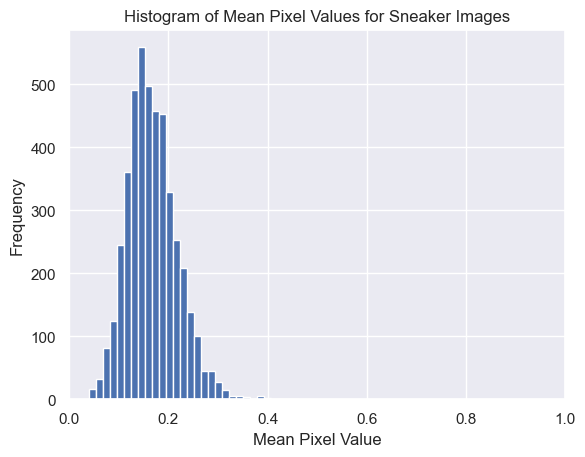

In [16]:
# YOUR CODE HERE
# 1 

# identify the sneaker images
sneaker_images = X_train_mini[Y_train_mini == 1]
mean_sneaker_pixels = sneaker_images.mean(axis=1)

print("Mean pixel value across all sneaker images:", mean_sneaker_pixels.mean())

plt.hist(mean_sneaker_pixels, bins=30)
plt.title('Histogram of Mean Pixel Values for Sneaker Images')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Frequency')
# set the x-axis to show full range 0 to 1 
plt.xlim(0, 1)
plt.show()

Mean pixel value across all non-sneaker images: 0.2989438652535293


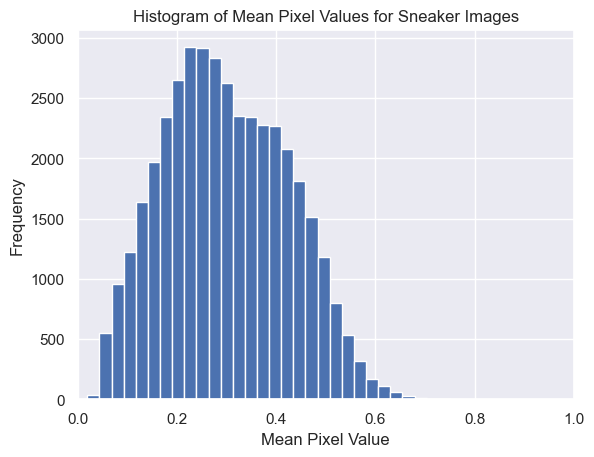

In [17]:
# 2
non_sneaker_images = X_train_mini[Y_train_mini == 0]
mean_non_sneaker_pixels = non_sneaker_images.mean(axis=1)

print("Mean pixel value across all non-sneaker images:", mean_non_sneaker_pixels.mean())

plt.hist(mean_non_sneaker_pixels, bins=30)
plt.title('Histogram of Mean Pixel Values for Sneaker Images')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Frequency')

# set the x-axis to show full range 0 to 1 
plt.xlim(0, 1)
plt.show()

In [18]:
# 3

# Based only on the histograms, I am optimistic that the pixel values can be used to classify sneakers from non-sneakers. 
# The sneakers pixel values seem to be lower on average than the non-sneakers. 
# Also, non-sneakers have a wider range of common mean pixel values than the sneakers do


---
### Step 4: Modeling

### <span style="color:chocolate">Exercise 8:</span> Baseline model (10 points)

When dealing with classification problems, a simple baseline is to select the *majority* class (the most common label in the training set) and use it as the prediction for all inputs.

With this information in mind:

1. What is the number of sneaker images in Y_train_mini?


2. What is the number of non-sneaker images in Y_train_mini?


3. What is the majority class in Y_train_mini?


4. What is the accuracy of a majority class classifier for Y_train_mini?


5. Implement a function that computes the Log Loss (binary cross-entropy) metric and use it to evaluate this baseline on both the mini train (Y_train_mini) and validation (Y_val) data. Use 0.1 as the predicted probability for your baseline (reflecting what we know about the original distribution of classes in the mini training data). Hint: for additional help, see the file ``04 Logistic Regression with Tensorflow_helpers.ipynb``.

In [19]:
# YOUR CODE HERE

# 1
num_sneaker = len(Y_train_mini[Y_train_mini == 1])
print(f"Y_train_mini has {num_sneaker} sneaker images")

Y_train_mini has 4504 sneaker images


In [20]:
# 2
num_nonsneaker = len(Y_train_mini[Y_train_mini == 0])
print(f"Y_train_mini has {num_nonsneaker} non-sneaker images")

Y_train_mini has 40496 non-sneaker images


In [21]:
# 3: non-sneaker is the majority class

In [22]:
# 4: classifier accuracy = (correct predictions) / (total predictions)

baseline_accuracy = num_nonsneaker / len(Y_train_mini)
baseline_accuracy

0.8999111111111111

In [23]:
# 5
def baseline_classifier(X) -> np.array:
    """ always predicts the majority class probability 0.1 """
    return np.array([0.1]*len(X))

def log_loss(y_true, y_pred) -> float:
    """
    returns log loss function for y_predicted and y_true
    """
    return -1 * np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [24]:
log_loss(Y_train_mini, baseline_classifier(Y_train_mini))

0.325278282242767

In [25]:
log_loss(Y_val, baseline_classifier(Y_val))

0.32449704683749186

### <span style="color:chocolate">Exercise 9:</span> Improvement over Baseline with TensorFlow (10 points)

Let's use TensorFlow to train a binary logistic regression model much like you did in the previous assignment. The goal here is to build a ML model to improve over the baseline classifier.

1. Fill in the <span style="color:green">NotImplemented</span> parts of the build_model() function below by following the instructions provided as comments. Hint: the activation function, the loss, and the evaluation metric are different compared to the linear regression model;


2. Build and compile a model using the build_model() function and the (X_train_mini, Y_train_mini) data. Set learning_rate = 0.0001. Call the resulting object *model_tf*.


3. Train *model_tf* using the (X_train_mini, Y_train_mini) data. Set num_epochs = 5 and batch_size=32. Pass the (X_val, Y_val) data for validation. Hint: see the documentation behind the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method.



4. Generate a plot (for the mini training and validation data) with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title. Hint: check what the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method returns.

In [26]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # binary logistic regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,                # output dim
      input_shape=(num_features,),  # input dim
      use_bias=True,               # use a bias (intercept) param
      activation='sigmoid',
      kernel_initializer=tf.keras.initializers.Ones(),  # initialize params to 1
      bias_initializer=tf.keras.initializers.Ones(),    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch SGD
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # Finally, compile the model. Select the accuracy metric. This finalizes the graph for training.
  model.compile(optimizer=optimizer,
      loss='binary_crossentropy',
      metrics=['accuracy']
  )
    
  return model

In [27]:
tf.random.set_seed(0)
# 2. Build and compile model
# YOUR CODE HERE

model_tf = build_model(num_features = X_train_mini.shape[1], learning_rate = 0.0001)

# 3. Fit the model
# YOUR CODE HERE

model_tf_history = model_tf.fit(X_train_mini, Y_train_mini, epochs = 5, batch_size=32, validation_data=(X_val, Y_val))

2024-06-10 10:43:58.401466: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-10 10:43:58.401628: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2024-06-10 10:43:58.823927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-10 10:43:58.845408: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignVariableOp.


1407/1407 [==============================] - ETA: 0s - loss: 205.9492 - accuracy: 0.1001

2024-06-10 10:44:09.016604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 12s 8ms/step - loss: 205.9492 - accuracy: 0.1001 - val_loss: 200.8128 - val_accuracy: 0.0997
Epoch 2/5
1407/1407 [==============================] - 11s 8ms/step - loss: 194.2051 - accuracy: 0.1001 - val_loss: 189.0351 - val_accuracy: 0.0997
Epoch 3/5
1407/1407 [==============================] - 12s 9ms/step - loss: 182.4632 - accuracy: 0.1001 - val_loss: 177.2547 - val_accuracy: 0.0997
Epoch 4/5
1407/1407 [==============================] - 11s 8ms/step - loss: 170.7186 - accuracy: 0.1001 - val_loss: 165.4758 - val_accuracy: 0.0997
Epoch 5/5
1407/1407 [==============================] - 12s 8ms/step - loss: 158.9753 - accuracy: 0.1001 - val_loss: 153.6942 - val_accuracy: 0.0997


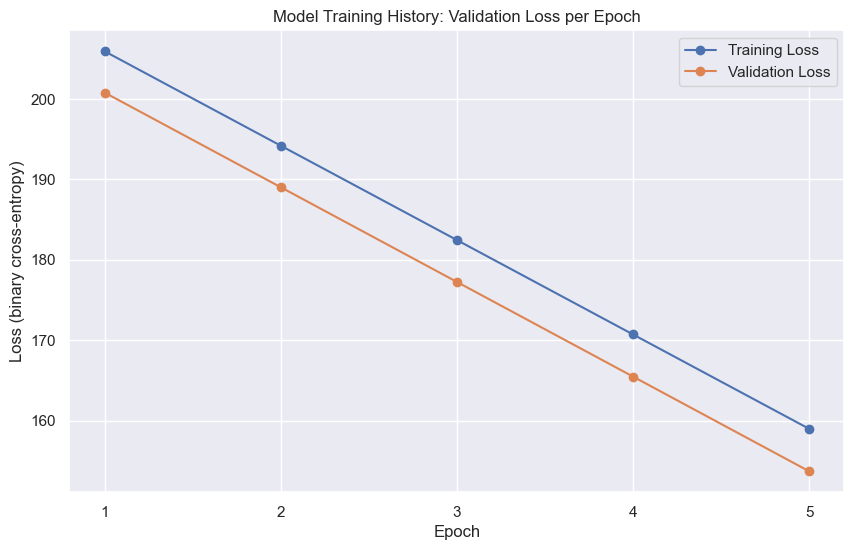

{'loss': [205.94920349121094, 194.20513916015625, 182.46319580078125, 170.7185516357422, 158.9752655029297], 'accuracy': [0.10008888691663742, 0.10008888691663742, 0.10008888691663742, 0.10008888691663742, 0.10008888691663742], 'val_loss': [200.81280517578125, 189.03506469726562, 177.25473022460938, 165.475830078125, 153.69418334960938], 'val_accuracy': [0.09973333030939102, 0.09973333030939102, 0.09973333030939102, 0.09973333030939102, 0.09973333030939102]}


In [28]:
# 4. Generate a plot of loss values across the epochs

def plot_training_history(model_history):
    """ Generates a plot to visualize loss (mse) at each epoch when the model was trained.

    Args:
        model: a tf.keras.model history object that contains the training history.
    """

    history = model_history.history
    real_epoch = range(1, len(history['loss']) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(real_epoch, history['loss'], label = 'Training Loss', marker = 'o')
    plt.plot(real_epoch, history['val_loss'], label = 'Validation Loss', marker = 'o')

    plt.xlabel('Epoch')
    plt.xticks(real_epoch)
    plt.ylabel('Loss (binary cross-entropy)')
    # plt.ylim(bottom=3, top=7)

    plt.title('Model Training History: Validation Loss per Epoch')
    plt.legend()
    plt.show()

    # print out the history values too
    print(history)


plot_training_history(model_tf_history)

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning is a crucial step in optimizing ML models. It involves systematically adjusting hyperparameters such as learning rate, number of epochs, and optimizer to find the model configuration that leads to the best generalization performance.

This tuning process is typically conducted by monitoring the model's performance on the validation vs. training set. It's important to note that using the test set for hyperparameter tuning can compromise the integrity of the evaluation process by violating the assumption of "blindness" of the test data.

### <span style="color:chocolate">Exercise 10:</span> Hyperparameter tuning (10 points)

1. Fine-tune the hyperparameters of *model_tf* to determine the setup that yields the most optimal performance. Feel free to explore various values for the hyperparameters. Hint: ask your instructors and TAs for help if in doubt.

After identifying your preferred model configuration, print the following information:

2. The first five learned parameters of the model (this should include the bias term);
3. The loss at the final epoch on both the mini training and validation datasets;
4. The percentage difference between the losses observed on the mini training and validation datasets.
5. Compare the training/validation loss of the TensorFlow model (model_tf) with the baseline model's loss. Does the TensorFlow model demonstrate an improvement over the baseline model?


Please note that we will consider 'optimal model configuration' any last-epoch loss that is below 0.08.

In [29]:
tf.random.set_seed(0)
# YOUR CODE HERE
# NOTE: I changed the learning rate from 0.0001 to 0.1 and increased to 50 epochs (although only need 30 to reach loss goal of below 0.08)

tuned_epochs=10
tuned_learning_rate = 0.1
tuned_batch_size = 32

model_tf_tuned = build_model(num_features = X_train_mini.shape[1], learning_rate = tuned_learning_rate)

tuned_model_history = model_tf_tuned.fit(x = X_train_mini, 
                                         y = Y_train_mini, 
                                         epochs = tuned_epochs, 
                                         batch_size = tuned_batch_size, 
                                         validation_data = (X_val, Y_val))

Epoch 1/10
   1/1407 [..............................] - ETA: 6:15 - loss: 197.8135 - accuracy: 0.0938

2024-06-10 10:44:57.525836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-10 10:44:57.545281: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignVariableOp.


1407/1407 [==============================] - ETA: 0s - loss: 2.3395 - accuracy: 0.9218

2024-06-10 10:45:07.415953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 12s 8ms/step - loss: 2.3395 - accuracy: 0.9218 - val_loss: 0.1333 - val_accuracy: 0.9565
Epoch 2/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.1015 - accuracy: 0.9672 - val_loss: 0.0805 - val_accuracy: 0.9691
Epoch 3/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0741 - accuracy: 0.9750 - val_loss: 0.0644 - val_accuracy: 0.9747
Epoch 4/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0632 - accuracy: 0.9790 - val_loss: 0.0605 - val_accuracy: 0.9764
Epoch 5/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0579 - accuracy: 0.9806 - val_loss: 0.0542 - val_accuracy: 0.9791
Epoch 6/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.0549 - accuracy: 0.9814 - val_loss: 0.0523 - val_accuracy: 0.9797
Epoch 7/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0529 - accuracy: 0.9816 - val_loss: 0.0515 - val_accuracy: 0.9

In [30]:
# 2: 
# Retrieve the weights of the model (there are 784 weights becasue input layer has 784 parameters)
weights = model_tf_tuned.get_weights()

print("First 5 weights: \n", weights[0][:5])
print("the bias term:", weights[1])

First 5 weights: 
 [[0.9997239]
 [0.9991822]
 [0.9881316]
 [0.9720539]
 [0.9390891]]
the bias term: [-2.142273]


In [31]:
# 3:
# The loss at the final epoch on both the mini training and validation datasets;
final_epoch = tuned_epochs - 1

# Get the training and validation loss from the history object
tuned_final_loss_train = tuned_model_history.history['loss'][final_epoch]
tuned_final_loss_val = tuned_model_history.history['val_loss'][final_epoch]

print(f"{tuned_final_loss_train = :.5f}")
print(f"{tuned_final_loss_val = :.5f}")

tuned_final_loss_train = 0.04952
tuned_final_loss_val = 0.05018


In [32]:
# 4
# The percentage difference between the losses observed on the mini training and validation datasets.

percentage_difference = ((tuned_final_loss_val - tuned_final_loss_train) / tuned_final_loss_train)
print(f"{percentage_difference = :.3%}")

percentage_difference = 1.335%


In [33]:
# 5

baseline_final_loss_train = model_tf_history.history['loss'][4]
baseline_final_loss_val = model_tf_history.history['val_loss'][4]

print(f"{baseline_final_loss_train = :.5f}")
print(f"{baseline_final_loss_val = :.5f}")

# The tuned model significantly outperforms the baseline model. We improved from a loss of 153 in the baseline validation dataset to .052 in the tuned tf model.

baseline_final_loss_train = 158.97527
baseline_final_loss_val = 153.69418


---
### Step 6: Evaluation and Generalization


Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

### <span style="color:chocolate">Exercise 11:</span> Computing accuracy (10 points)

1. Calculate aggregate accuracy on both mini train and test datasets using a probability threshold of 0.5. Hint: You can utilize the <span style="color:chocolate">model.evaluate()</span> method provided by tf.keras. Note: Aggregate accuracy measures the overall correctness of the model across all classes in the dataset;

2. Does the model demonstrate strong aggregate generalization capabilities? Provide an explanation based on your accuracy observations.

In [34]:
# YOUR CODE HERE
# 1 
# NOTE: model.evaluate() implicitly uses a probability threshold of 0.5

loss_mini, accuracy_train_mini = model_tf_tuned.evaluate(X_train_mini, Y_train_mini)
print(f"{accuracy_train_mini = :.3f}")

loss_test, accuracy_test = model_tf_tuned.evaluate(X_test, Y_test)
print(f"{accuracy_test = :.3f}")

1407/1407 [==============================] - 6s 4ms/step - loss: 0.0496 - accuracy: 0.9827
accuracy_train_mini = 0.983
313/313 [==============================] - 1s 4ms/step - loss: 0.0516 - accuracy: 0.9803
accuracy_test = 0.980


In [35]:
# 2: The tuned model does show strong generalization ability because the accuracy on the test (0.981) set is 
#    nearly the same as it is on the training set (0.982)

### <span style="color:chocolate">Exercise 12:</span> Fairness evaluation (10 points)

1. Generate and visualize the confusion matrix on the test dataset using a probability threshold of 0.5. Additionally, print the True Positives (TP), False Negatives (FN), False Positives (FP), and True Negatives (TN). Hint: you can utilize the <span style="color:chocolate">model.predict()</span> method available in tf.keras, and then the <span style="color:chocolate">confusion_matrix()</span>, <span style="color:chocolate">ConfusionMatrixDisplay()</span> methods available in sklearn.metrics;


2. Compute subgroup accuracy, separately for the sneaker and non-sneaker classes, on the test dataset using a probability threshold of 0.5. Reflect on any observed accuracy differences (potential lack of fairness) between the two classes.


3. Does the model demonstrate strong subgroup generalization capabilities? Provide an explanation based on your accuracy observations.

2024-06-10 10:46:52.688110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Confusion Matrix:
 [[8915   85]
 [ 112  888]]
True Positives: 888
False Negatives: 112
False Positives: 85
True Negatives: 8915


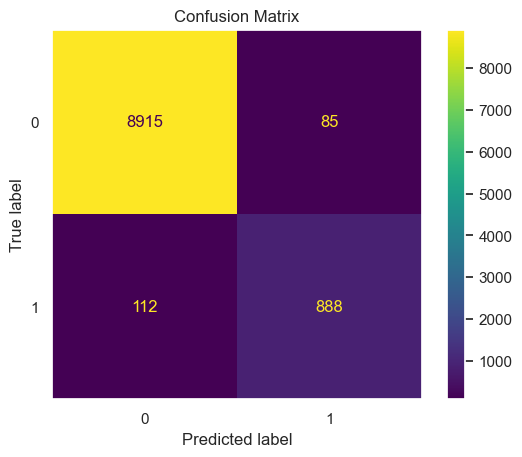

In [36]:
# 1
def calculate_confusion_matrix(model, X: np.ndarray, Y: np.ndarray, threshold = 0.5) -> tuple:
    """
    Generate and visualize the confusion matrix on the dataset using a given probability threshold.

    Args:
        model: The trained tf.keras model.
        X: Features of the dataset.
        Y: True labels of the dataset.
        threshold: The probability threshold to classify the predictions (default is 0.5).

    Returns:
        tuple: Confusion matrix array and its components (TP, FN, FP, TN). Also prints the confusion matrix visualization.
    """
    # Make predictions
    predictions = model.predict(X, verbose=0)

    # convert predicted proba balues to classes according to threshold
    predicted_classes = (predictions >= threshold).astype(int)

    # Calculate the confusion matrix
    cm = confusion_matrix(Y, predicted_classes)

    # Extract True Positives, False Negatives, False Positives, and True Negatives
    TP = cm[1, 1]
    FN = cm[1, 0]
    FP = cm[0, 1]
    TN = cm[0, 0]

    # print confusion matrix info
    print(f"Confusion Matrix:\n", cm)
    print(f"True Positives: {TP}")
    print(f"False Negatives: {FN}")
    print(f"False Positives: {FP}")
    print(f"True Negatives: {TN}")

    # Visualize the confusion matrix
    cmdisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    cmdisplay.plot()
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()
    
    return cm

# Calculate and visualize the confusion matrix for the test dataset
cm_tuned_model = calculate_confusion_matrix(model_tf_tuned, X_test, Y_test, threshold=0.5)

In [37]:
# 2

def calculate_subgroup_accuracy(model, X, Y, threshold=0.5):
    """
    Compute subgroup accuracy for sneaker and non-sneaker classes on the test dataset.

    Args:
        model: The trained tf.keras model.
        X: Features of the test dataset.
        Y: True labels of the test dataset.
        threshold: The probability threshold to classify the predictions (default is 0.5).

    Returns:
        Accuracy for sneaker and non-sneaker classes.
    """

    # Make predictions and convert probabilities to classes
    predicted_classes = np.where((model.predict(X) >= threshold), 1, 0)

    # Get the index of all true sneaker and non-sneaker images from input Y
    true_sneaker_index = np.where(Y == 1)[0]
    true_other_index = np.where(Y == 0)[0]

    # Calculate the number of samples in each subgroup
    total_num_sneakers = len(true_sneaker_index)
    total_num_other = len(true_other_index)

    # Calculate the number of correct predictions in each subgroup
    correct_sneaker_preds = np.sum(predicted_classes[true_sneaker_index] == 1)
    correct_other_preds = np.sum(predicted_classes[true_other_index] == 0)

    # Calculate the accuracy for each subgroup
    sneaker_accuracy = correct_sneaker_preds / total_num_sneakers
    other_accuracy = correct_other_preds / total_num_other

    # correct_other_preds, total_num_other, sneaker_accuracy, other_accuracy
    return sneaker_accuracy, other_accuracy

# Calculate subgroup accuracy for the test dataset
sneaker_accuracy, other_accuracy = calculate_subgroup_accuracy(model_tf_tuned, X_test, Y_test, threshold=0.5)
print(f"{sneaker_accuracy = :.2%}")
print(f"{other_accuracy = :.2%}")

""" The model seems to be very good at identifying both sneakers and non sneakers, but it is slightly more accurate when identifying non-sneaker images """

313/313 [==============================] - 0s 1ms/step
sneaker_accuracy = 88.80%
other_accuracy = 99.06%


' The model seems to be very good at identifying both sneakers and non sneakers, but it is slightly more accurate when identifying non-sneaker images '

In [38]:
# 3
""" yes, the model does demonstrate strong subgroup demonstration ability. It achieved a 94% and 98% accuracy when \
identifying the sneaker and non-sneaker subgroups, respectively, in the test dataset. \
This is inline with the model's overall performance on the train dataset as well, where it achieved 98.3% accuracy. \
"""

" yes, the model does demonstrate strong subgroup demonstration ability. It achieved a 94% and 98% accuracy when identifying the sneaker and non-sneaker subgroups, respectively, in the test dataset. This is inline with the model's overall performance on the train dataset as well, where it achieved 98.3% accuracy. "

----
### <span style="color:chocolate">Bonus question</span> (20 points)

Is it possible to enhance the prediction accuracy for the sneaker class by performing the following steps?

1. Implement data balancing techniques, such as oversampling or undersampling, to equalize the representation of both classes.
2. After balancing the data, retrain the model on the balanced dataset.
3. Evaluate the model's performance, particularly focusing on the accuracy achieved for the sneaker class.

Note: provide a separate notebook for the Bonus exercise. Name it ``04 Logistic Regression with Tensorflow_bonus``.

313/313 [==============================] - 0s 1ms/step
[  1   5   6  30  43  44  48  59  71  87  96 101 104 106 118 120 125 148
 156 183 196 199 202 205 213 243 249 254 264 267 273 277 283 284 288 290
 293 294 301 311 327 331 333 339 354 355 360 385 387 405 412 415 418 424
 427 454 474 488 495 504 511 515 527 541 552 576 602 607 617 633 634 638
 650 655 657 677 681 687 694 702 720 724 730 743 747 757 760 767 769 770
 777 795 802 806 820 843 849 863 868 872 882 893 897 907 909 916 951 952
 955 960 981 996]


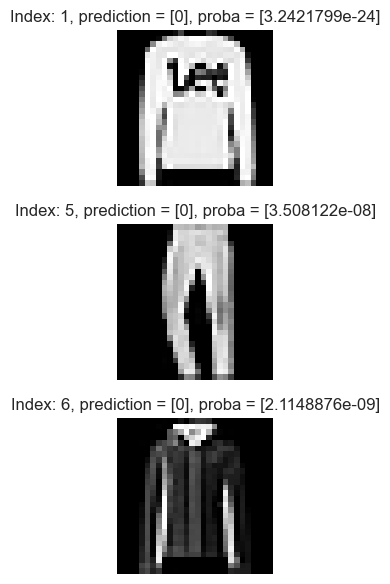

In [39]:

# Function to plot incorrect sneaker images
def plot_incorrect_sneakers(model = model_tf_tuned, images = X_test, true_labels = Y_test, n = 5):
    # Do the predictions
    pred_proba = model_tf_tuned.predict(X_test)
    class_predictions = np.where((pred_proba >= 0.5), 1, 0)

    # Get the index of all true sneaker and non-sneaker images from input Y
    true_sneaker_index = np.where(true_labels == 1)[0]

    # Define the class label for sneakers
    incorrect_sneaker_indices = np.where(class_predictions[true_sneaker_index] == 0)[0]
    print(incorrect_sneaker_indices)

    # Get the first n incorrect sneaker indices
    first_n_incorrect_sneaker_indices = incorrect_sneaker_indices[:n]
    # print(first_n_incorrect_sneaker_indices)

    # Plot the first n incorrect sneaker images
    plt.figure(figsize=(5, n * 2))

    for i, idx in enumerate(first_n_incorrect_sneaker_indices):
        plt.subplot(n, 1, i + 1)
        plt.imshow(images[idx].reshape(28,28), cmap='gray')
        plt.title(f'Index: {idx}, prediction = {class_predictions[idx]}, proba = {pred_proba[idx]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    

# Example usage
plot_incorrect_sneakers(n=3)